In [1]:
python3 main.py

SyntaxError: invalid syntax (293366439.py, line 1)

In [2]:
%run main.py

INFO:scene_setup:Starting scene setup with ray tracing...


XLA can lead to reduced numerical precision. Use with care.


DEBUG:scene_setup:Debugging Base station state:
DEBUG:scene_setup:- Position: [10.  10.   4.5]
DEBUG:scene_setup:- Orientation: [  0.   0. -90.]
DEBUG:scene_setup:- Array config: <sionna.rt.antenna_array.PlanarArray object at 0x000001CB22DE65D0>
DEBUG:scene_setup:Debugging RIS state:
DEBUG:scene_setup:- Position: [10.  19.5  2.5]
DEBUG:scene_setup:- Orientation: [  0. -90.   0.]
DEBUG:scene_setup:Debugging AGV_0 state:
DEBUG:scene_setup:- Position: [12.   5.   0.5]
DEBUG:scene_setup:- Orientation: [0. 0. 0.]
DEBUG:scene_setup:- Array config: <sionna.rt.antenna_array.PlanarArray object at 0x000001CB22E0A390>
DEBUG:scene_setup:Debugging AGV_1 state:
DEBUG:scene_setup:- Position: [ 8.  15.   0.5]
DEBUG:scene_setup:- Orientation: [0. 0. 0.]
DEBUG:scene_setup:- Array config: <sionna.rt.antenna_array.PlanarArray object at 0x000001CB22DF7B90>
INFO:scene_setup:Scene setup completed successfully
INFO:scene_setup:- Transmitters: 7
INFO:scene_setup:- Receivers: 2
INFO:scene_setup:- RIS: 1
INFO:sc

Generating channel data...
Generating channel data...
Channel data generation completed
Channel data saved to: C:\Users\snatanzi\Desktop\Causal-XAI\src\results\channel_data.h5

Channel Data Statistics:
Channel matrices shape: (1, 2, 1, 7, 128, 1, 1024)
Path delays shape: (1, 2, 7, 2)
Number of receivers: 2
Execution completed


In [9]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from config import SmartFactoryConfig
from channel_generator import SmartFactoryChannel



DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [11]:
# Initialize configuration
config = SmartFactoryConfig()

# Update the ray tracing method to a valid option
config.ray_tracing['method'] = 'fibonacci'  # or 'exhaustive'

# Create channel generator
channel_gen = SmartFactoryChannel(config)

# Generate channel
channel_data = channel_gen.generate_channel()

INFO:scene_setup:Starting scene setup with ray tracing...


XLA can lead to reduced numerical precision. Use with care.


DEBUG:scene_setup:Debugging Base station state:
DEBUG:scene_setup:- Position: [10.  10.   4.5]
DEBUG:scene_setup:- Orientation: [  0.   0. -90.]
DEBUG:scene_setup:- Array config: <sionna.rt.antenna_array.PlanarArray object at 0x000001CB22E31C50>
DEBUG:scene_setup:Debugging RIS state:
DEBUG:scene_setup:- Position: [10.  19.5  2.5]
DEBUG:scene_setup:- Orientation: [  0. -90.   0.]
DEBUG:scene_setup:Debugging AGV_0 state:
DEBUG:scene_setup:- Position: [12.   5.   0.5]
DEBUG:scene_setup:- Orientation: [0. 0. 0.]
DEBUG:scene_setup:- Array config: <sionna.rt.antenna_array.PlanarArray object at 0x000001CBA5695010>
DEBUG:scene_setup:Debugging AGV_1 state:
DEBUG:scene_setup:- Position: [ 8.  15.   0.5]
DEBUG:scene_setup:- Orientation: [0. 0. 0.]
DEBUG:scene_setup:- Array config: <sionna.rt.antenna_array.PlanarArray object at 0x000001CBA5623510>
INFO:scene_setup:Scene setup completed successfully
INFO:scene_setup:- Transmitters: 7
INFO:scene_setup:- Receivers: 2
INFO:scene_setup:- RIS: 1
INFO:sc

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEn

TypeError: Invalid shape (1, 2, 1, 7, 128, 1, 1024) for image data

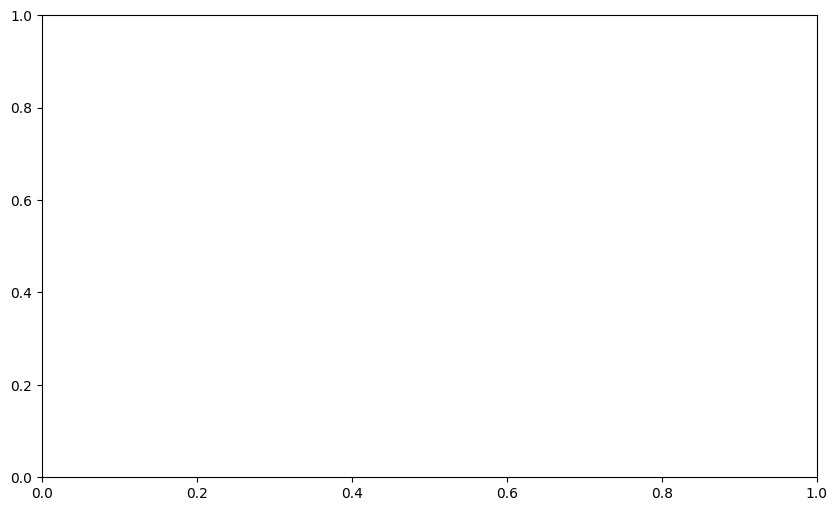

In [13]:
# Now let's visualize the channel data
if 'h' in channel_data:
    # Plot channel magnitude
    plt.figure(figsize=(10,6))
    magnitude_db = 20 * np.log10(np.abs(channel_data['h'].numpy()))
    plt.imshow(magnitude_db, aspect='auto', cmap='viridis')
    plt.colorbar(label='Magnitude (dB)')
    plt.xlabel('Subcarrier Index')
    plt.ylabel('Antenna Index')
    plt.title('Channel Magnitude Response')
    plt.show()

if 'paths' in channel_data:
    # Plot path delays
    plt.figure(figsize=(10,6))
    delays = channel_data['paths'].tau.numpy().flatten()
    plt.hist(delays, bins=50)
    plt.xlabel('Delay (s)')
    plt.ylabel('Count')
    plt.title('Path Delay Distribution')
    plt.grid(True)
    plt.show()

# Print channel statistics
print("\nChannel Statistics:")
if 'h' in channel_data:
    h_numpy = channel_data['h'].numpy()
    print(f"Channel matrix shape: {h_numpy.shape}")
    print(f"Maximum magnitude: {np.max(np.abs(h_numpy)):.2f}")
    print(f"Minimum magnitude: {np.min(np.abs(h_numpy)):.2f}")

if 'paths' in channel_data:
    print(f"\nPath Statistics:")
    print(f"Number of paths: {len(channel_data['paths'].tau.numpy().flatten())}")
    print(f"Maximum delay: {np.max(channel_data['paths'].tau.numpy()):.2e} s")
    print(f"Minimum delay: {np.min(channel_data['paths'].tau.numpy()):.2e} s")